# Simulating Aeroplane Chess

Aeroplane Chess( [WiKi](https://en.wikipedia.org/wiki/Aeroplane_Chess) ) is one of China's classic modern board games

</br >
<center>
<img src="ipynb.images/board.jpg" width=400 />
</center>

Two to four players each try to get all their own plane pieces from their hangars, located at the corners of the board, into the base of their own color in the center of the board. Each player takes a turn by rolling the dice. On a turn a player may do the following:
* Take a piece out of the hangar onto the board. This can only be done by rolling a 6
* When a plane lands on a space of its own color, it immediately jumps to the next space of its own color.
* There are additional "shortcut" squares. When a plane lands on one of these of its own color, it may take the shortcut.This may also by done in succession with the previous rule, with a jump leading to shortcut. A direct land on a shortcut may be followed by a jump.
* Plane must fly into the center base on an exact roll. If a player cannot move pieces into the center base by an exact roll of the die, then they must move their piece backwards according to number rolled.

In oder to simulate the game with Markovian，I ignore some rules and focus on only one read plane

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd

%matplotlib inline

## Direct Simulation

use a Python dictionary to store the jumps:

In [2]:
red = {3:7,7:11,11:15,15:31,19:35,23:27,27:31,31:35,35:39,39:43,43:47,47:51}

In [3]:
import random

def simulate(rseed=None):
    random.seed()
    position = 0
    turns = 0
    while position < 57:
        turns += 1
        roll = random.randint(1,6)
        #roll a 6 to take off
        if(position==0):
            if(roll==6):
                position =1
                continue
            else:
                continue
        
        # if the roll takes us past square 57, move back
        if position + roll > 57:
            position = 57 - (position + roll - 57)
            continue
            
        # otherwise, move the position according to the roll
        position += roll
        
        # make jumps
        position = red.get(position, position)
    return turns

In [4]:
simulate()

23

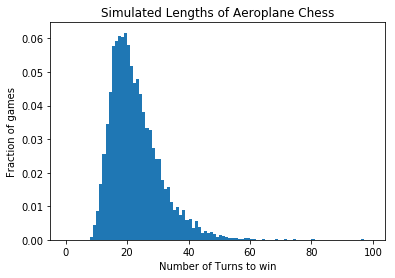

In [5]:
sim_games = [simulate() for i in range(10000)]

plt.hist(sim_games, bins=range(100), density=True)
plt.xlabel('Number of Turns to win')
plt.ylabel('Fraction of games')
plt.title('Simulated Lengths of Aeroplane Chess');

## Markov Process

In [6]:
diceroll = np.zeros(58)
for index in range(6):
    diceroll[index+1] = 1
diceroll /= 6

In [7]:
board = np.zeros((58,58))
for row in range(1,52):
    board[row] = np.roll(diceroll, row)
pd.DataFrame(board)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.0,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


roll a 6 to take off

In [8]:
board[0,0]=5/6
board[0,1]=1/6
pd.DataFrame(board).head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.833333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,0.166667,0.166667,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Go back if the roll takes us past the destination

In [9]:
board[52,52:58]=[0,1/6,1/6,1/6,2/6,1/6]
board[53,52:58]=[0,0,1/6,2/6,2/6,1/6]
board[54,52:58]=[0,0,1/6,2/6,2/6,1/6]
board[55,52:58]=[0,1/6,1/6,1/6,2/6,1/6]
board[56,52:58]=[1/6,1/6,1/6,1/6,1/6,1/6]
board[57,57]=1
pd.DataFrame(board)[51:58]

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.166667,0.166667,0.166667,0.333333,0.166667
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.333333,0.333333,0.166667
54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.166667,0.333333,0.333333,0.166667
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.166667,0.166667,0.166667,0.333333,0.166667
56,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


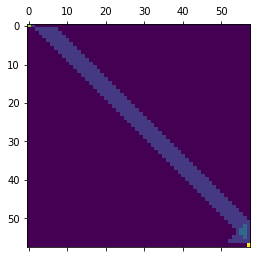

In [10]:
plt.matshow(board)
plt.grid(False)

In [11]:
jump = np.zeros((58,58))
ind = [red.get(i, i) for i in range(58)]
jump[range(58),ind] = 1

In [12]:
transition = board @ jump
pd.DataFrame(transition)

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.833333,0.166667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.166667,0.0,0.166667,0.166667,0.166667,0.166667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.166667,0.166667,0.166667,0.166667,0.166667,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.166667,0.166667,0.166667,0.000000,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.166667,0.166667,0.000000,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.166667,0.000000,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.166667,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


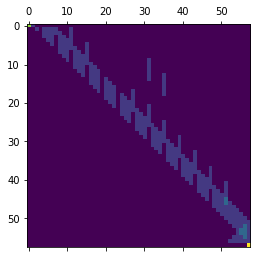

In [13]:
plt.matshow(transition)
plt.grid(False)

verify that transition is stochastic:

In [14]:
for i in range(58):
    if (~np.isclose(np.sum(transition[i]),1)):
        print("non stochastic: " + str(i))

The start position:

In [15]:
p = [1, *np.zeros(57)]
p @ transition @ transition

array([0.69444444, 0.13888889, 0.02777778, 0.        , 0.02777778,
       0.02777778, 0.02777778, 0.02777778, 0.        , 0.        ,
       0.        , 0.02777778, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [16]:
def probability(n):
    p = [1, *np.zeros(57)]
    return p @ np.linalg.matrix_power(transition, n)

In [17]:
probs = [probability(i)[-1] for i in range(100)]

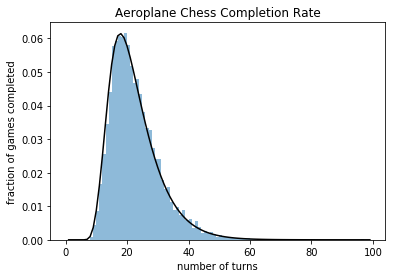

In [18]:
plt.hist(sim_games, bins=range(100), density=True,
         align='mid', alpha=0.5);
plt.plot(np.arange(1, 100), np.diff(probs), color='black')
plt.title('Aeroplane Chess Completion Rate')
plt.xlabel('number of turns')
plt.ylabel('fraction of games completed');

direct simulation was quite close to the Markov model

The cumulative distribution:

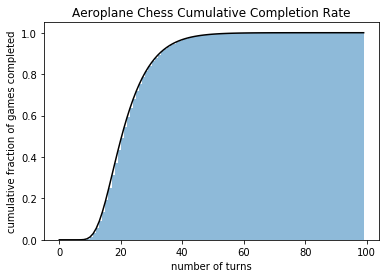

In [19]:
plt.hist(sim_games, bins=range(100), density=True,
         align='mid', cumulative=True, alpha=0.5);
plt.plot(np.arange(100), probs, color='black');
plt.title('Aeroplane Chess Cumulative Completion Rate')
plt.xlabel('number of turns')
plt.ylabel('cumulative fraction of games completed');

we can see that 90% of single plane games finish within about 33 moves

## Minimum Game Length

In [20]:
probs[1:8]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00012502857796067672]

there is a nonzero probability of finishing the game in just seven moves

In [21]:
from scipy.sparse.csgraph import shortest_path
lengths, predecessors = shortest_path(transition, indices=0, directed=True,
                                      unweighted=True, return_predecessors=True)

the length of the shortest path from state 0 to each of the other states:

In [22]:
lengths

array([ 0.,  1.,  2., inf,  2.,  2.,  2.,  2.,  3.,  3.,  3.,  2.,  3.,
        3.,  3.,  3.,  3.,  3.,  4., inf,  4.,  4.,  4., inf,  5.,  5.,
        5.,  4.,  5.,  5.,  5.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,
        4.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  5.,  6.,  6.,  6.,  6.,
        6.,  6.,  7.,  7.,  7.,  7.])

one of the shortest paths:

In [23]:
path = [57]
while path[0] > 0:
    path.insert(0, predecessors[path[0]])
path

[0, 1, 5, 15, 35, 43, 51, 57]

## Typical Game Length¶

The mean game length is the expected value of the number of turns, averaged over all possibilities and weighted by their relative probability:

In [24]:
turns = np.arange(1, len(probs))
np.dot(np.diff(probs), turns)

22.376160539490705

on average, a player will finish one plane in about 22 turns.

the median game length:

In [25]:
np.searchsorted(probs, 0.5)

21

approximately 50% of games will be finished in fewer than 21 moves, and 50% will be finished in more than 21 moves.

the peak of the probability distribution:

In [26]:
np.argmax(np.diff(probs)) + 1

18

you'll finish the game in 18 moves more often than any other specific number of moves.

Confidence interva:

In [27]:
np.searchsorted(probs, [0.025, 0.975])

array([11, 42])

95% of the time, games will last between 11 and 42 turns

## Eigenvectors and Eigenvalues

In [28]:
from numpy import linalg as la
w, v = la.eig(transition)

In [29]:
w

array([ 8.33333333e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.66666667e-01, -

In [30]:
v

array([[ 1.00000000e+000, -1.96116135e-001,  1.96116135e-001, ...,
         1.96116135e-001,  8.42184691e-003,  1.31306433e-001],
       [ 0.00000000e+000,  9.80580676e-001, -9.80580676e-001, ...,
        -9.80580676e-001, -5.05310815e-002,  1.31306433e-001],
       [ 0.00000000e+000,  0.00000000e+000,  3.41953285e-290, ...,
         1.35641075e-016,  5.94359632e-001,  1.31306433e-001],
       ...,
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  1.71110858e-003,  1.31306433e-001],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  1.62733243e-002,  1.31306433e-001],
       [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000, ...,
         0.00000000e+000,  0.00000000e+000,  1.31306433e-001]])

In [31]:
v[0]

array([ 1.        , -0.19611614,  0.19611614,  0.        , -0.19611614,
        0.19611614, -0.19611614, -0.19611614,  0.19611614, -0.19611614,
        0.19611614,  0.19611614, -0.19611614,  0.19611614, -0.19611614,
       -0.19611614,  0.19611614, -0.19611614,  0.19611614,  0.        ,
       -0.19611614,  0.19611614, -0.19611614,  0.        ,  0.19611614,
       -0.19611614,  0.19611614,  0.19611614, -0.19611614,  0.19611614,
       -0.19611614, -0.19611614,  0.19611614, -0.19611614,  0.19611614,
        0.19611614, -0.19611614,  0.19611614, -0.19611614, -0.19611614,
        0.19611614, -0.19611614,  0.19611614,  0.19611614, -0.19611614,
        0.19611614, -0.19611614, -0.19611614,  0.19611614, -0.19611614,
        0.19611614, -0.19611614, -0.01087427,  0.19611614,  1.        ,
        0.19611614,  0.00842185,  0.13130643])

maximal eigenvalue:

In [32]:
for i in range(58):
    print(abs(w[i]))

0.8333333333333334
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.1666666666666666
6.245004513516506e-17
0.8333333333333333
2.3054549534694013e-17
0.16666666666666666
1.0


So, the last eigenvector is the dominant eigenvector.

In [33]:
dominant = v[57]
dominant

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.13130643])

As we have set up the transition matrix, once you reach state 57 you remain there with 100% probability. In mathematical terms, the end of the game is an "absorbing state", because once you are there you cannot transition to any other state. What this means is that Aeroplane Chess is an absorbing Markov Chain.